# Logistic Regression

#### Objective: Predict churn using logistic regression

Dataset: ibm.xlsx

Target:
    - Churn

Features:
    - customerID
    - gender
    - SeniorCitizen
    - Partner
    - Dependents
    - tenure
    - PhoneService
    - MultipleLines
    - InternetService
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
    - Contract
    - PaperlessBilling
    - PaymentMethod
    - MonthlyCharges
    - TotalCharges

## Import Libraries

In [1]:
# Main Libraries
import pandas as pd
import numpy as np
import time

# Visual Libraries
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Logistic Model
from sklearn.linear_model import LogisticRegression
# Train - Test Split
from sklearn.model_selection import train_test_split
# Pre-processing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
# Cross - Validate
from sklearn.model_selection import cross_val_score
# Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

In [3]:
import pickle

## Load Data

In [4]:
# Read Data
df = pd.read_excel('ibm.xlsx')
df.head()

,WA_Fn-UseC_-Telco-Customer-Churn 2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No


In [5]:
# Delete first row, make 0th row the header
headers = df.iloc[0]
df = pd.DataFrame(df.values[1:], columns = headers)
col_list = list(df.columns)
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object', name=0)

In [6]:
# Size of the dataframe
df.shape

(7043, 21)

In [7]:
# Summary statistics of the dataframe
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7036,7014,7041,7042,7035,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.00,7043,7043
unique,7043,2,2,2,2,73,2,3,3,3,...,3,3,3,3,3,2,4,1585.00,6531,2
top,5989-AXPUC,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
freq,1,3555,5901,3641,4928,609,6359,3390,3092,3498,...,3095,3473,2810,2785,3875,4171,2365,61.00,11,5174


## Data Pre-processing

- ### Whitespaces and Null Values

In [8]:
# Remove whitespaces, replace nan to None
for col in col_list:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.strip(' ')
    df[col] = df[col].apply(lambda x: None if (x == 'nan') or (x == '') else x)

In [9]:
# Compute percent of null values of each columns
df_null = pd.DataFrame(df.isnull().sum())
df_null.columns = ['PercentNull']
df_null = df_null['PercentNull'].apply(lambda x: (x/(df.shape[0]))*100)
df_null

0
customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.099389
tenure              0.411756
PhoneService        0.028397
MultipleLines       0.014198
InternetService     0.113588
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
Name: PercentNull, dtype: float64

In [10]:
# Drop null values
df = df.dropna()

# Drop customerID, TotalCharges - derived from MonthlyCharges
df = df.drop(['customerID', 'TotalCharges'], axis=1)

# Reset index
df = df.reset_index(drop = True)

In [11]:
# Transform MultipleLines column
df['MultipleLines'] = df.MultipleLines.apply(lambda x: 'No' if x == 'No phone service' else x)

# Add new column: HasInternetService
df['HasInternetService'] = df.InternetService.apply(lambda x: 'No' if x == 'No' else 'Yes')

# Transform OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies columns
noInternetService = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in noInternetService:
    df[col] = df[col].apply(lambda x: 'No' if x == 'No internet service' else x)

- ### Get Dummies

In [12]:
# Add dummy variables
catColumns_dummy = ['InternetService', 'Contract', 'PaymentMethod']
df_withDummy = df.copy()
add_dummy = pd.DataFrame()

for col in catColumns_dummy:
    add_dummy = pd.get_dummies(df_withDummy[col])
    df_withDummy = pd.concat([df_withDummy, add_dummy], axis ='columns')

# Drop the InternetService, Contract, PaymentMethod, No columns
catColumns_drop = ['InternetService', 'Contract', 'PaymentMethod', 'No']
df_withDummy = df_withDummy.drop(catColumns_drop, axis=1)

df_withDummy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,HasInternetService,DSL,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,Female,0,Yes,No,1,No,No,No,Yes,No,...,Yes,1,0,1,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,...,Yes,1,0,0,1,0,0,0,0,1
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,...,Yes,1,0,1,0,0,0,0,0,1
3,Male,0,No,No,45,No,No,Yes,No,Yes,...,Yes,1,0,0,1,0,1,0,0,0
4,Female,0,No,No,2,Yes,No,No,No,No,...,Yes,0,1,1,0,0,0,0,1,0


- ### LabelEncoder

In [13]:
categoryColumns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling', 'Churn', 'HasInternetService']

contColumns = ['tenure', 'MonthlyCharges']

# Transform categorical values to numerical values
LE = LabelEncoder()
df_LE = df_withDummy.copy()

for col in categoryColumns:
    df_LE[col] = LE.fit_transform(df_LE[col])

# Convert datatype of columns in contColumns to float
for col in contColumns:
    df_LE[col] = df_LE[col].astype(float)

df_LE.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,HasInternetService,DSL,Fiber optic,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1.0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34.0,1,0,1,0,1,...,1,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2.0,1,0,1,1,0,...,1,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45.0,0,0,1,0,1,...,1,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2.0,1,0,0,0,0,...,1,0,1,1,0,0,0,0,1,0


In [37]:
df_LE.to_excel('resu.xlsx')

- ### Split Train - Test dataset

In [14]:
# Separate features and target variables
X = df_LE.drop(['Churn'], axis = 1)
y = df_LE.loc[:, ['Churn']]

# Split dataset into Train (80%) - Test (20%) Dataset ; random_state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Print shape of the train - test datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5591, 25), (5591, 1), (1398, 25), (1398, 1))

In [15]:
# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [16]:
# Separating continuous columns from the X_train, X_test (no need to scale 1, 0 columns)
X_train_cont = X_train[contColumns]
X_test_cont = X_test[contColumns]

In [17]:
# Drop continuous columns from the X_train
X_train = X_train.drop(contColumns, axis = 1)
X_test = X_test.drop(contColumns, axis = 1)

- ### Scaling the dataset using StandardScaler

In [18]:
# Standardize
SScaler = StandardScaler()

#Fit the scaler to the training set (continuous columns)
SScaler.fit(X_train_cont)

#Transform the training set
X_train_scaled = pd.DataFrame(SScaler.transform(X_train_cont), columns = contColumns)

#Transform the test set
X_test_scaled = pd.DataFrame(SScaler.transform(X_test_cont), columns = contColumns)

In [19]:
# Concat X_train_scaled, X_test_scaled to X_train and X_test
X_train = pd.concat([X_train, X_train_scaled], axis = 'columns')
X_test = pd.concat([X_test, X_test_scaled], axis = 'columns')

# Print train - test datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5591, 25), (5591, 1), (1398, 25), (1398, 1))

In [20]:
# Rename columns
dataSets = [X_train, X_test]

for dset in dataSets:
    dset.columns = ['IsMale', 'IsSeniorCitizen', 'HasPartner', 'HasDependents', 'HasPhoneService',
                    'HasMulitpleLines', 'HasOnlineSecurity', 'HasOnlineBackup', 'HasDeviceProtection',
                    'HasTechSupport', 'HasStreamingTV', 'HasStreamingMovies', 'IsPaperlessBilling',
                    'HasInternetService', 'IsDSL', 'IsFiberOptic', 'IsMonthToMonth',
                    'IsOneYear', 'IsTwoYear', 'IsBankTransfer', 'IsCreditCard', 'IsElectronicCheck',
                    'IsMailedCheck', 'Tenure', 'MonthlyCharges']

## Feature Selection

In [21]:
df_TrainedCleaned = pd.concat([X_train, y_train], axis = 'columns')
df_TestCleaned = pd.concat([X_test, y_test], axis = 'columns')
df_cleaned = pd.concat([df_TrainedCleaned, df_TestCleaned])
df_cleaned.shape

(6989, 26)

In [22]:
# Correlation Matrix
corr = df_cleaned.corr()
corr

,IsMale,IsSeniorCitizen,HasPartner,HasDependents,HasPhoneService,HasMulitpleLines,HasOnlineSecurity,HasOnlineBackup,HasDeviceProtection,HasTechSupport,...,IsMonthToMonth,IsOneYear,IsTwoYear,IsBankTransfer,IsCreditCard,IsElectronicCheck,IsMailedCheck,Tenure,MonthlyCharges,Churn
IsMale,1.000000,-0.002431,-0.000746,0.009308,-0.007294,-0.008551,-0.015068,-0.012221,-0.001050,-0.007816,...,-0.003479,0.007852,-0.003428,-0.015968,0.002421,0.000563,0.012748,0.004690,-0.012303,-0.007951
IsSeniorCitizen,-0.002431,1.000000,0.017752,-0.209630,0.009842,0.146677,-0.037621,0.067118,0.059666,-0.060046,...,0.137745,-0.046738,-0.115937,-0.014655,-0.024426,0.168982,-0.151844,0.016372,0.221411,0.150883
HasPartner,-0.000746,0.017752,1.000000,0.452413,0.017584,0.142444,0.142275,0.141404,0.152623,0.119602,...,-0.279497,0.083153,0.246378,0.111635,0.081713,-0.083244,-0.096639,0.382222,0.096978,-0.149790
HasDependents,0.009308,-0.209630,0.452413,1.000000,-0.000146,-0.024885,0.079614,0.023310,0.013520,0.061337,...,-0.227948,0.069265,0.199558,0.051829,0.060364,-0.148548,0.056874,0.162393,-0.112960,-0.162800
HasPhoneService,-0.007294,0.009842,0.017584,-0.000146,1.000000,0.279495,-0.090676,-0.051524,-0.070625,-0.096064,...,-0.000598,-0.004157,0.004658,0.007566,-0.006765,0.004307,-0.005677,0.006811,0.247933,0.011425
HasMulitpleLines,-0.008551,0.146677,0.142444,-0.024885,0.279495,1.000000,0.099255,0.203034,0.201648,0.100526,...,-0.088509,-0.003633,0.106573,0.073852,0.061380,0.084751,-0.228564,0.332491,0.491536,0.039731
HasOnlineSecurity,-0.015068,-0.037621,0.142275,0.079614,-0.090676,0.099255,1.000000,0.282913,0.274626,0.354178,...,-0.246460,0.102383,0.189566,0.094038,0.115758,-0.111845,-0.080482,0.328557,0.296068,-0.171069
HasOnlineBackup,-0.012221,0.067118,0.141404,0.023310,-0.051524,0.203034,0.282913,1.000000,0.303546,0.294837,...,-0.164709,0.085725,0.110200,0.086525,0.090608,-0.000005,-0.174319,0.360975,0.441737,-0.083456
HasDeviceProtection,-0.001050,0.059666,0.152623,0.013520,-0.070625,0.201648,0.274626,0.303546,1.000000,0.333157,...,-0.227187,0.105548,0.164097,0.082836,0.112488,-0.004017,-0.187637,0.362211,0.481868,-0.067545
HasTechSupport,-0.007816,-0.060046,0.119602,0.061337,-0.096064,0.100526,0.354178,0.294837,0.333157,1.000000,...,-0.284071,0.096043,0.239424,0.100572,0.116950,-0.114120,-0.085539,0.325894,0.337513,-0.166221


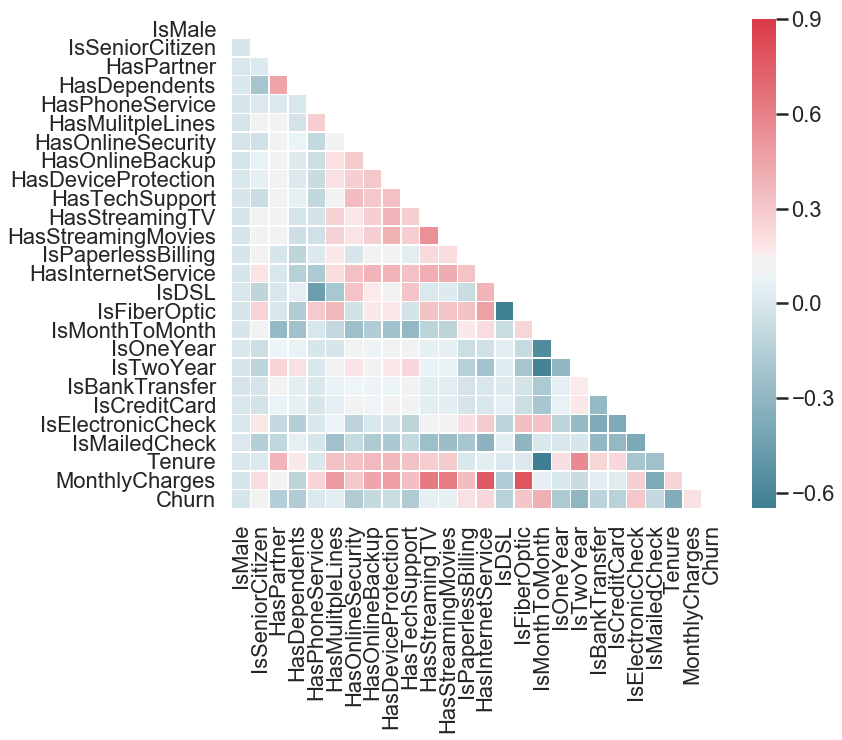

In [23]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax, xticklabels=True, yticklabels=True)

## Build Model

In [24]:
# Get correlation churn VS features, removed negative sign
corrChurn = corr.loc['Churn'].abs()

# Sort values, drop churn row
corrChurn = pd.DataFrame(corrChurn.sort_values(ascending = False).drop(['Churn']))

# Make index a column namely Features
corrChurn = corrChurn.reset_index()
corrChurn = corrChurn.rename(columns={'index': 'Features'})
corrChurn

,Features,Churn
0,IsMonthToMonth,0.406606
1,Tenure,0.355742
2,IsFiberOptic,0.307285
3,IsElectronicCheck,0.302201
4,IsTwoYear,0.301937
5,HasInternetService,0.227838
6,IsPaperlessBilling,0.193002
7,MonthlyCharges,0.192056
8,IsOneYear,0.180253
9,HasOnlineSecurity,0.171069


In [25]:
def topN_train(n):
    '''
    n: top N
    returns: X_train with the top N features only
    '''
    topN = corrChurn.iloc[0:n]
    topN = topN['Features'].tolist()
    return X_train[topN]

def topN_test(n):
    '''
    n: top N
    returns: X_test with the top N features only
    '''
    topN = corrChurn.iloc[0:n]
    topN = topN['Features'].tolist()
    return X_test[topN]

In [26]:
def get_accuracy(exp_C, n):
    '''
    exp_C: Inverse of regularization strength
    n: top N
    returns: accuracy score
    '''
    # Build the Model
    logreg = LogisticRegression(C=exp_C, class_weight="balanced", solver='liblinear', random_state=25)
    # Fit the Model
    logreg.fit(topN_train(n), y_train)
    # Make Predictions
    y_pred = logreg.predict(topN_test(n))
    
    return accuracy_score(y_test, y_pred)

In [27]:
def get_precision(exp_C, n):
    '''
    exp_C: Inverse of regularization strength
    n: top N
    returns: accuracy score
    '''
    # Build the Model
    logreg = LogisticRegression(C=exp_C, class_weight="balanced", solver='liblinear', random_state=25)
    # Fit the Model
    logreg.fit(topN_train(n), y_train)
    # Make Predictions
    y_pred = logreg.predict(topN_test(n))
    
    
    return precision_score(y_test, y_pred)

## Result Matrix

In [28]:
def dict_accuracy():
    '''
    returns: dictionary of the result accuracy scores
    '''
    expC = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    dict_result = {}
    list_result = []
    for c in expC:
        for top in range(5,9):
            # Append accuracy scores in list_resul
            list_result.append(get_accuracy(c, top))
        # Add an entry in dict_result: key = c, values = list_result
        dict_result[c] = list_result
        # Clear list_result
        list_result = []
    
    return dict_result

In [29]:
columnsResult = ['Top5', 'Top6', 'Top7', 'Top8']
result_matrix = pd.DataFrame(dict_accuracy()).transpose()
result_matrix.columns = columnsResult
result_matrix

,Top5,Top6,Top7,Top8
1.00000,0.743205,0.741059,0.745351,0.745351
0.10000,0.737482,0.740343,0.743205,0.738913
0.01000,0.720315,0.720315,0.721030,0.734621
0.00100,0.656652,0.652361,0.650215,0.676681
0.00010,0.599428,0.585122,0.579399,0.605150
0.00001,0.587983,0.564378,0.541488,0.568670


In [30]:
def dict_precision():
    '''
    returns: dictionary of the result accuracy scores
    '''
    expC = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    dict_result = {}
    list_result = []
    for c in expC:
        for top in range(5,9):
            # Append accuracy scores in list_resul
            list_result.append(get_precision(c, top))
        # Add an entry in dict_result: key = c, values = list_result
        dict_result[c] = list_result
        # Clear list_result
        list_result = []
    
    return dict_result

In [31]:
result_matrix_pre = pd.DataFrame(dict_precision()).transpose()
result_matrix_pre.columns = columnsResult
result_matrix_pre

,Top5,Top6,Top7,Top8
1.00000,0.512367,0.509874,0.515152,0.515044
0.10000,0.505208,0.508834,0.512411,0.507042
0.01000,0.485669,0.485623,0.486529,0.501706
0.00100,0.426813,0.423338,0.422667,0.443812
0.00010,0.387755,0.379511,0.377702,0.396770
0.00001,0.381008,0.369757,0.358351,0.378178


### Cross Validation

Model: LogisticRegression(C=0.1, class_weight="balanced", solver='liblinear', random_state=25)

Features: IsMonthToMonth, Tenure, IsFiberOptic, IsElectronicCheck, IsTwoYear, HasInternetService, IsPaperlessBilling

In [32]:
def get_mean_cross_val_score(model, n, xTrain, yTrain):
    '''
    model: KNN, LogReg, Decision Tree
    n: number of folds
    returns: mean cross validated score
    '''
    return np.mean(cross_val_score(model, xTrain, yTrain, cv=n))

In [33]:
top7_featList = ['IsMonthToMonth', 'Tenure', 'IsFiberOptic',
                 'IsElectronicCheck', 'IsTwoYear',
                 'HasInternetService', 'IsPaperlessBilling']
X_train_top7 = X_train[top7_featList]
X_test_top7 = X_test[top7_featList]

In [34]:
# Build the Model
model = LogisticRegression(C=0.1, class_weight="balanced", solver='liblinear', random_state=25)
# Fit the Model
model.fit(X_train_top7, y_train)
# Make Predictions
y_pred = model.predict(X_test_top7)

get_mean_cross_val_score(model, 5, X_train_top7, y_train)

0.7444125001033874

In [35]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=25,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1025
           1       0.51      0.77      0.62       373

   micro avg       0.74      0.74      0.74      1398
   macro avg       0.71      0.75      0.71      1398
weighted avg       0.80      0.74      0.76      1398




### Deploy ML Models as a REST APi

In [36]:
pickle.dump(model, open('model.pkl', 'wb'))